In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
wide_df = pd.read_csv('wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv('long_data.csv', usecols=['date', 'datatype', 'value'], parse_dates=['date'])[['date', 'datatype', 'value']] # sort value

In [3]:
# Wide format
# Our variables each have their own column:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [4]:
# Describing all the columns is easy:
wide_df.describe(include='all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


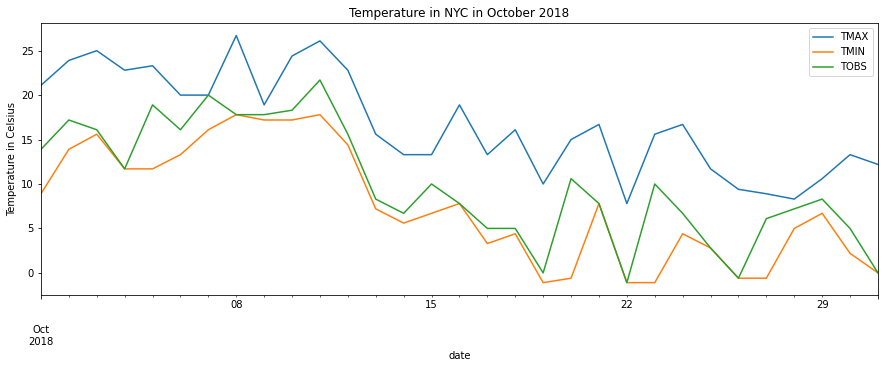

In [5]:
# graph with pandas:
wide_df.plot(
    kind='line', y=['TMAX', 'TMIN', 'TOBS'], x='date',
    title='Temperature in NYC in October 2018',
    figsize=(15, 5)
).set_ylabel('Temperature in Celsius')
plt.show()

In [6]:
long_df .head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


In [7]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


In [8]:
# we use another format for plotting for long format dara , use seaborn:
import seaborn as sns

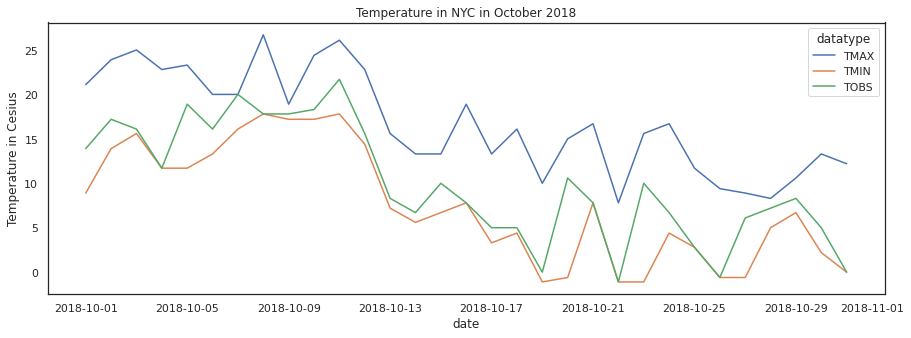

In [9]:
sns.set(rc={'figure.figsize':(15, 5)}, style='white')

ax = sns.lineplot(data=long_df, hue='datatype', y='value', x='date')
ax.set_ylabel('Temperature in Cesius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

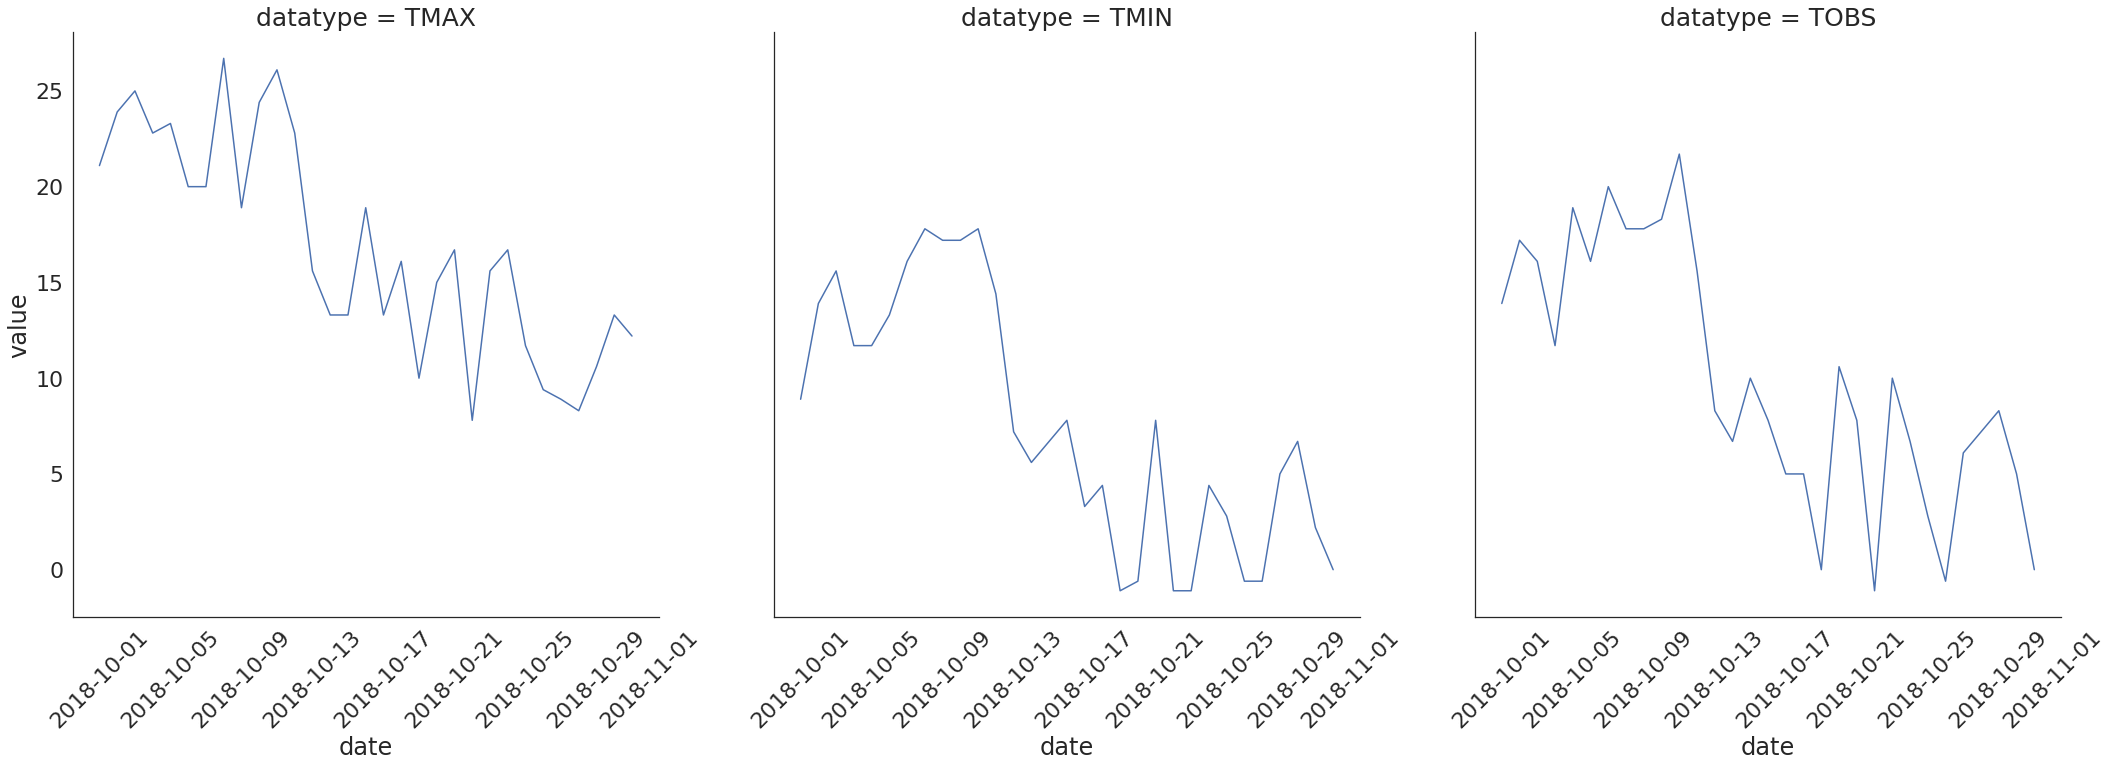

In [10]:
# With long data and seaborn, we can easily facet our plots:
sns.set(rc={'figure.figsize':(20, 10)}, style='white', font_scale=2)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()